# Phishing URL Prediction

---

## Project Objective

Develop an advanced machine learning model to classify URLs as either **phishing (0)** or **legitimate (1)** by analyzing features extracted from the **URL structure, content, and metadata**. The goal is to **detect phishing attempts in real-time** and enhance cybersecurity by protecting users from malicious websites and online threats.

---

## Dataset Information

- **Source:** [PhishIIL - Phishing URL Dataset (UCI)](https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)
- **No. of Rows:** 235,795  
- **No. of Columns:** 54  
- **Target Variable:** `label`  
  - `1` → Legitimate URL  
  - `0` → Phishing URL  

---

## Data Story

Phishing remains one of the most common and dangerous cyber threats, tricking users into clicking deceptive links that steal personal information or financial credentials. Traditional URL filtering techniques fail to keep up with the dynamic tactics used in phishing. 

This project aims to **analyze features like URL length, presence of HTTPS, obfuscation, HTML structure, and behavioral elements** to predict whether a URL is phishing or not using **Supervised Machine Learning**. The dataset is rich with URL-based, content-based, behavior-based, and keyword-based features that provide insights for building a reliable model.

---

## Feature Overview

The dataset consists of 54 features grouped into the following categories:

- **URL & Domain-Based Features** (e.g., `URLLength`, `DomainLength`, `IsDomainIP`)
- **Character-Based Features** (e.g., `URLCharProb`, `NoOfSubDomain`, `ObfuscationRatio`)
- **Security & HTTPS Features** (e.g., `IsHTTPS`)
- **Web Page Content Features** (e.g., `LineOfCode`, `Title`, `DomainTitleMatchScore`)
- **Website Behavior Features** (e.g., `Robots`, `NoOfURLRedirect`)
- **Social & Interactive Features** (e.g., `NoOfPopup`, `HasPasswordField`)
- **Keyword Presence Features** (e.g., `Bank`, `Pay`, `Crypto`)
- **Multimedia & External Links** (e.g., `NoOfImage`, `NoOfExternalRef`)
- **Target Variable:** `label` (0 = Phishing, 1 = Legitimate)

---


## Data Preprocessing 




# Importing Required Libraries

In this project, we will use a variety of Python libraries for:
- Data manipulation and preprocessing
- Statistical analysis and visualization
- Feature selection and transformation
- Handling data imbalance
- Model building and evaluation
- Hyperparameter tuning
- Model saving and deployment

The libraries include:
- `pandas`, `numpy` for data handling
- `matplotlib`, `seaborn` for data visualization
- `sklearn` for preprocessing, feature selection, model building, and evaluation
- `imblearn` for oversampling using SMOTE
- `scipy` for statistical transformations
- `xgboost` for gradient boosting classification
- `joblib` for saving models


In [4]:
# Data Handling & Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection & Preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Statistical Transformations
from scipy.stats import boxcox

# Dimensionality Reduction
from sklearn.decomposition import PCA

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

# Saving the Model
import joblib


# Loading the Dataset

Now that all necessary libraries are imported, we begin by loading the dataset into a pandas DataFrame. This step ensures we can access and manipulate the data for preprocessing, analysis, and modeling.

We'll:
- Load the dataset using `pd.read_csv()`
- Display the first few records using `.head()`
- Confirm dataset structure using `.info()`


In [6]:
# Load the dataset with the correct filename
df = pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

# Display the first few rows
df.head()


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [7]:
# Check the structure and datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

# Observation

- The dataset was successfully loaded from `PhiUSIIL_Phishing_URL_Dataset.csv`.
- It contains **235,795 rows** and **56 columns**.
- The features are a mix of:
  - **Categorical (object)**: e.g., `FILENAME`, `URL`, `Domain`, `TLD`, `Title`
  - **Numerical (int64, float64)**: Most of the feature columns fall here
- The **target column** is `label`, with:
  - `1` indicating a legitimate URL
  - `0` indicating a phishing URL
- There are **no null values** in any of the columns, as all 56 columns show `235795 non-null`.

Next, we’ll examine the shape of the dataset and generate statistical summaries of the numerical features.


# Statistical Summary of Dataset

Now that the dataset is loaded, we will generate statistical summaries of the numerical features.

This step helps us:
- Understand the central tendencies (mean, median)
- Identify spread (standard deviation, min, max)
- Spot potential anomalies or inconsistencies
- Get a sense of data distribution which can influence preprocessing steps

We will use the `.describe()` method from pandas to generate this summary.
````````

In [10]:
# Display statistical summary of numerical features
df.describe()


,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


## Summary Statistics & Skewness Insights

- Several features like **URLLength**, **NoOfImage**, **NoOfJS** show large max values, indicating potential **outliers**.
- Binary indicators (e.g., **IsDomainIP**, **HasObfuscation**) are mostly 0, but their presence may correlate with phishing.
- The **label** is slightly imbalanced (more legitimate URLs), which may require **class balancing** later.
- Many features have **mean > median**, indicating **right-skewed distributions**.
- Skewness analysis helps identify features that might benefit from transformations like **Box-Cox or log-scaling**, which can improve model performance.


In [12]:
import pandas as pd
import numpy as np

# 1. Dataset shape
rows, cols = df.shape
print(f"Dataset contains {rows} rows and {cols} columns.\n")

# 2. Null value summary
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]

print("Columns with missing values:")
if null_counts.empty:
    print("No missing values detected.\n")
else:
    print(null_counts.to_string(), "\n")

# 3. Duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}\n")

# 4. Skewness of numerical features
numeric_df = df.select_dtypes(include=[np.number])
skewed_features = numeric_df.skew().sort_values(ascending=False)

print("Top 15 most skewed numerical features:")
print(skewed_features.head(15).to_string())


Dataset contains 235795 rows and 56 columns.

Columns with missing values:
No missing values detected.

Number of duplicate rows: 0

Top 15 most skewed numerical features:
NoOfCSS               464.404031
NoOfObfuscatedChar    204.684335
NoOfJS                140.435761
NoOfEqualsInURL       114.985479
NoOfEmptyRef          106.826225
NoOfAmpersandInURL    106.717256
NoOfiFrame             97.677347
NoOfDegitsInURL        94.877574
NoOfPopup              84.952694
NoOfExternalRef        65.900247
NoOfSelfRef            60.381378
NoOfLettersInURL       58.402581
URLLength              53.321737
LineOfCode             53.072297
LargestLineLength      48.179926


### Observation: Dataset Structure and Skewness

- The dataset contains **235,795 rows** and **56 columns**, indicating a large and comprehensive dataset.
- **No missing values** were found, so we don't need any imputation or cleaning for null entries.
- There are **no duplicate rows**, meaning the dataset is clean in terms of redundancy.
- **Several features are highly right-skewed**, with extreme skewness in:
  - `NoOfCSS` (464.40)
  - `NoOfObfuscatedChar` (204.68)
  - `NoOfJS`, `NoOfEqualsInURL`, and `NoOfEmptyRef` (above 100)
  - Even `URLLength` and `LineOfCode` have skewness over 50.
  
These skewed features suggest the need for **scaling and transformation** before feeding them into machine learning models, especially if we use algorithms sensitive to feature distribution (like Logistic Regression or KNN).


### Exploratory Data Analysis (EDA) 

Exploratory Data Analysis (EDA) helps us understand the structure of the data, identify patterns, and visualize any potential relationships between features and the target variable. We will:

1. **Check the basic structure** of the data (e.g., shape, missing values, duplicates).
2. **Visualize the distribution** of individual numerical features and the target variable.
3. **Explore correlations** between features using heatmaps and scatter plots.
4. **Identify any anomalies** such as skewed distributions or outliers that could affect the model performance.

This analysis will guide our data cleaning, feature selection, and further preprocessing steps.


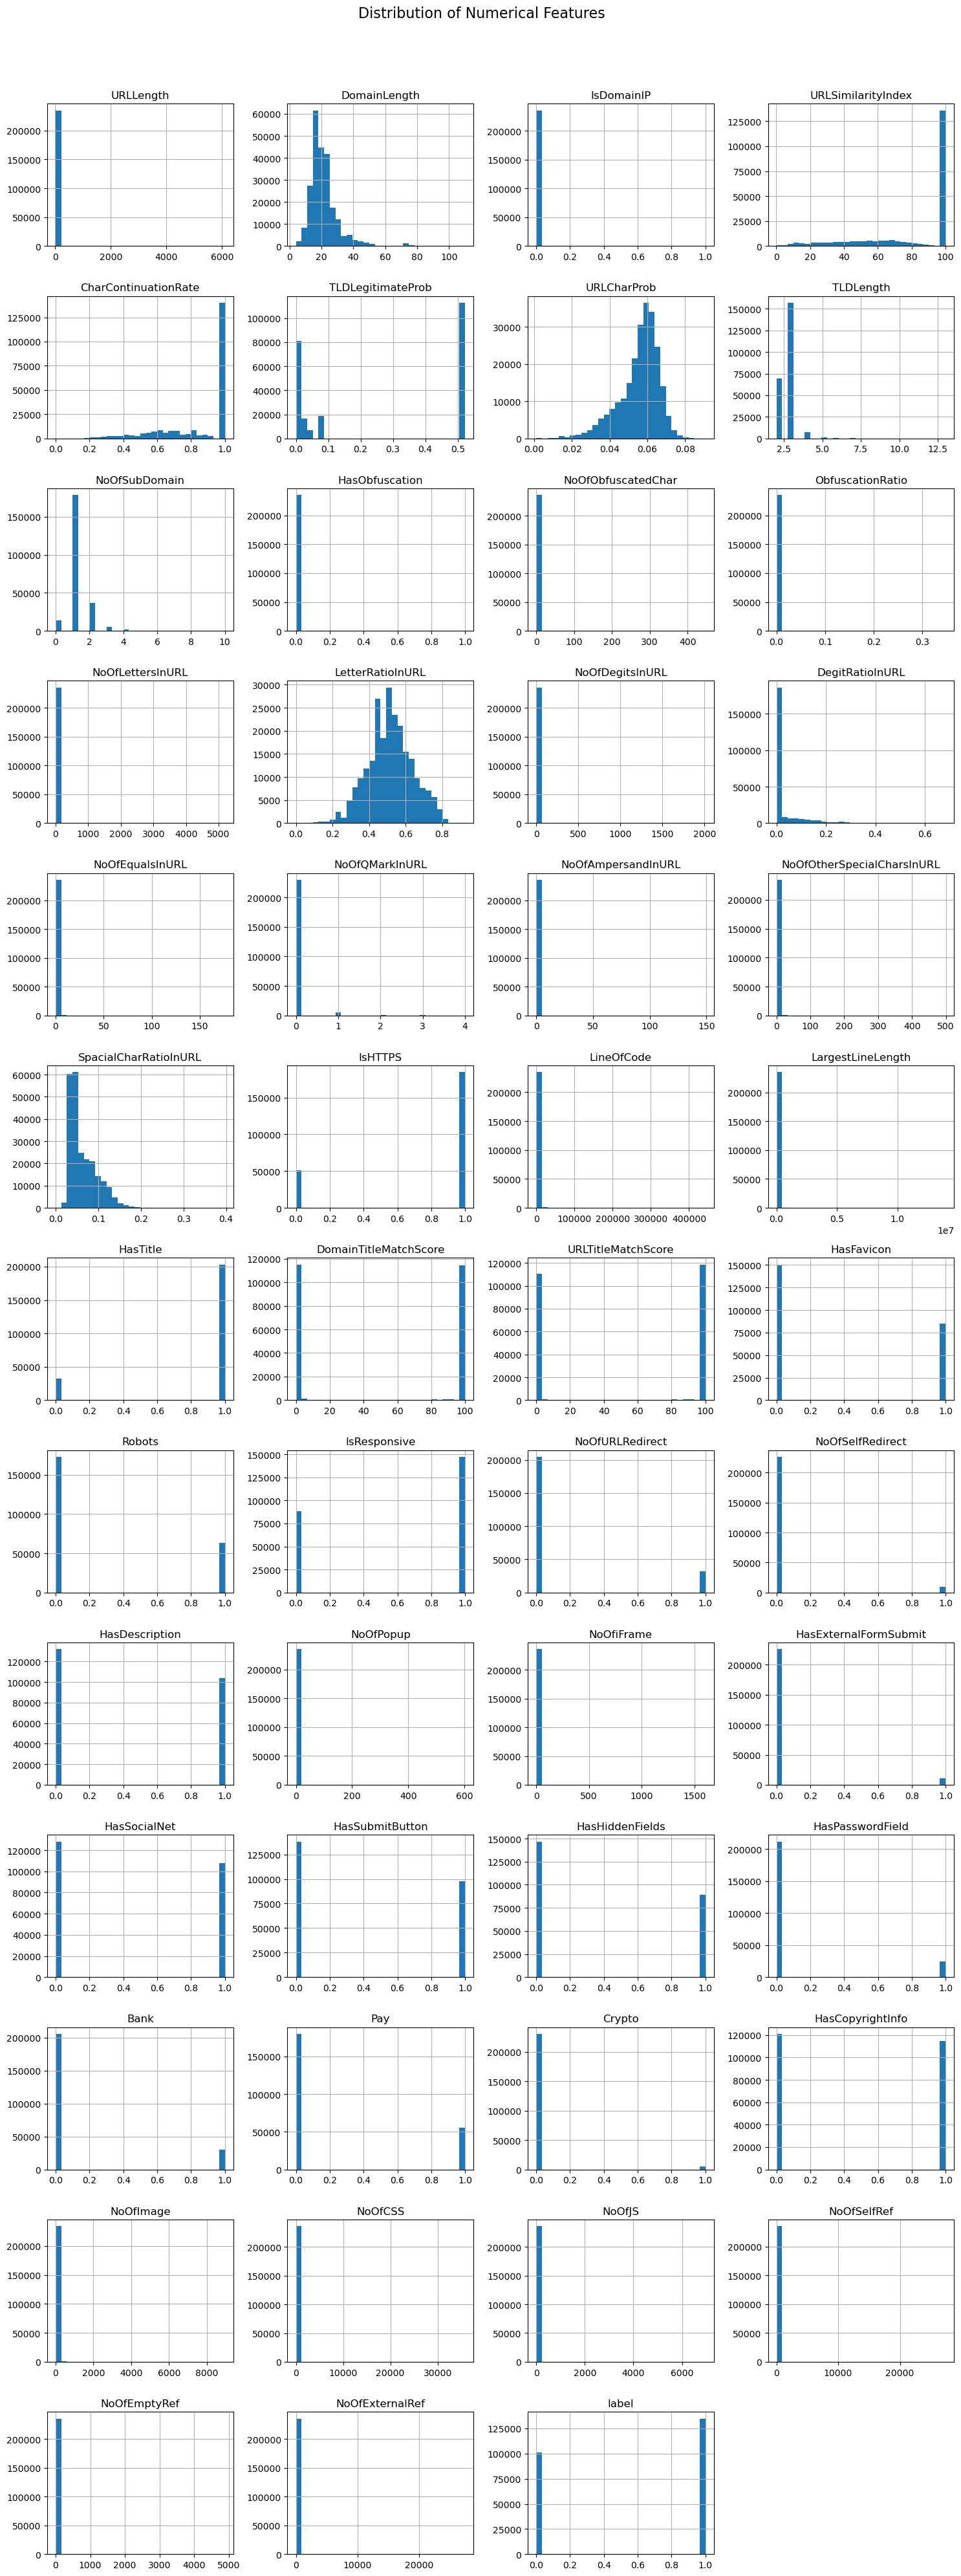

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate rows and columns for subplots
n_cols = 4  # Set the number of columns
n_rows = int(np.ceil(len(numeric_cols) / n_cols))  # Calculate required rows

# Plot histograms for numeric columns
df[numeric_cols].hist(figsize=(15, n_rows * 3), bins=30, layout=(n_rows, n_cols))

plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


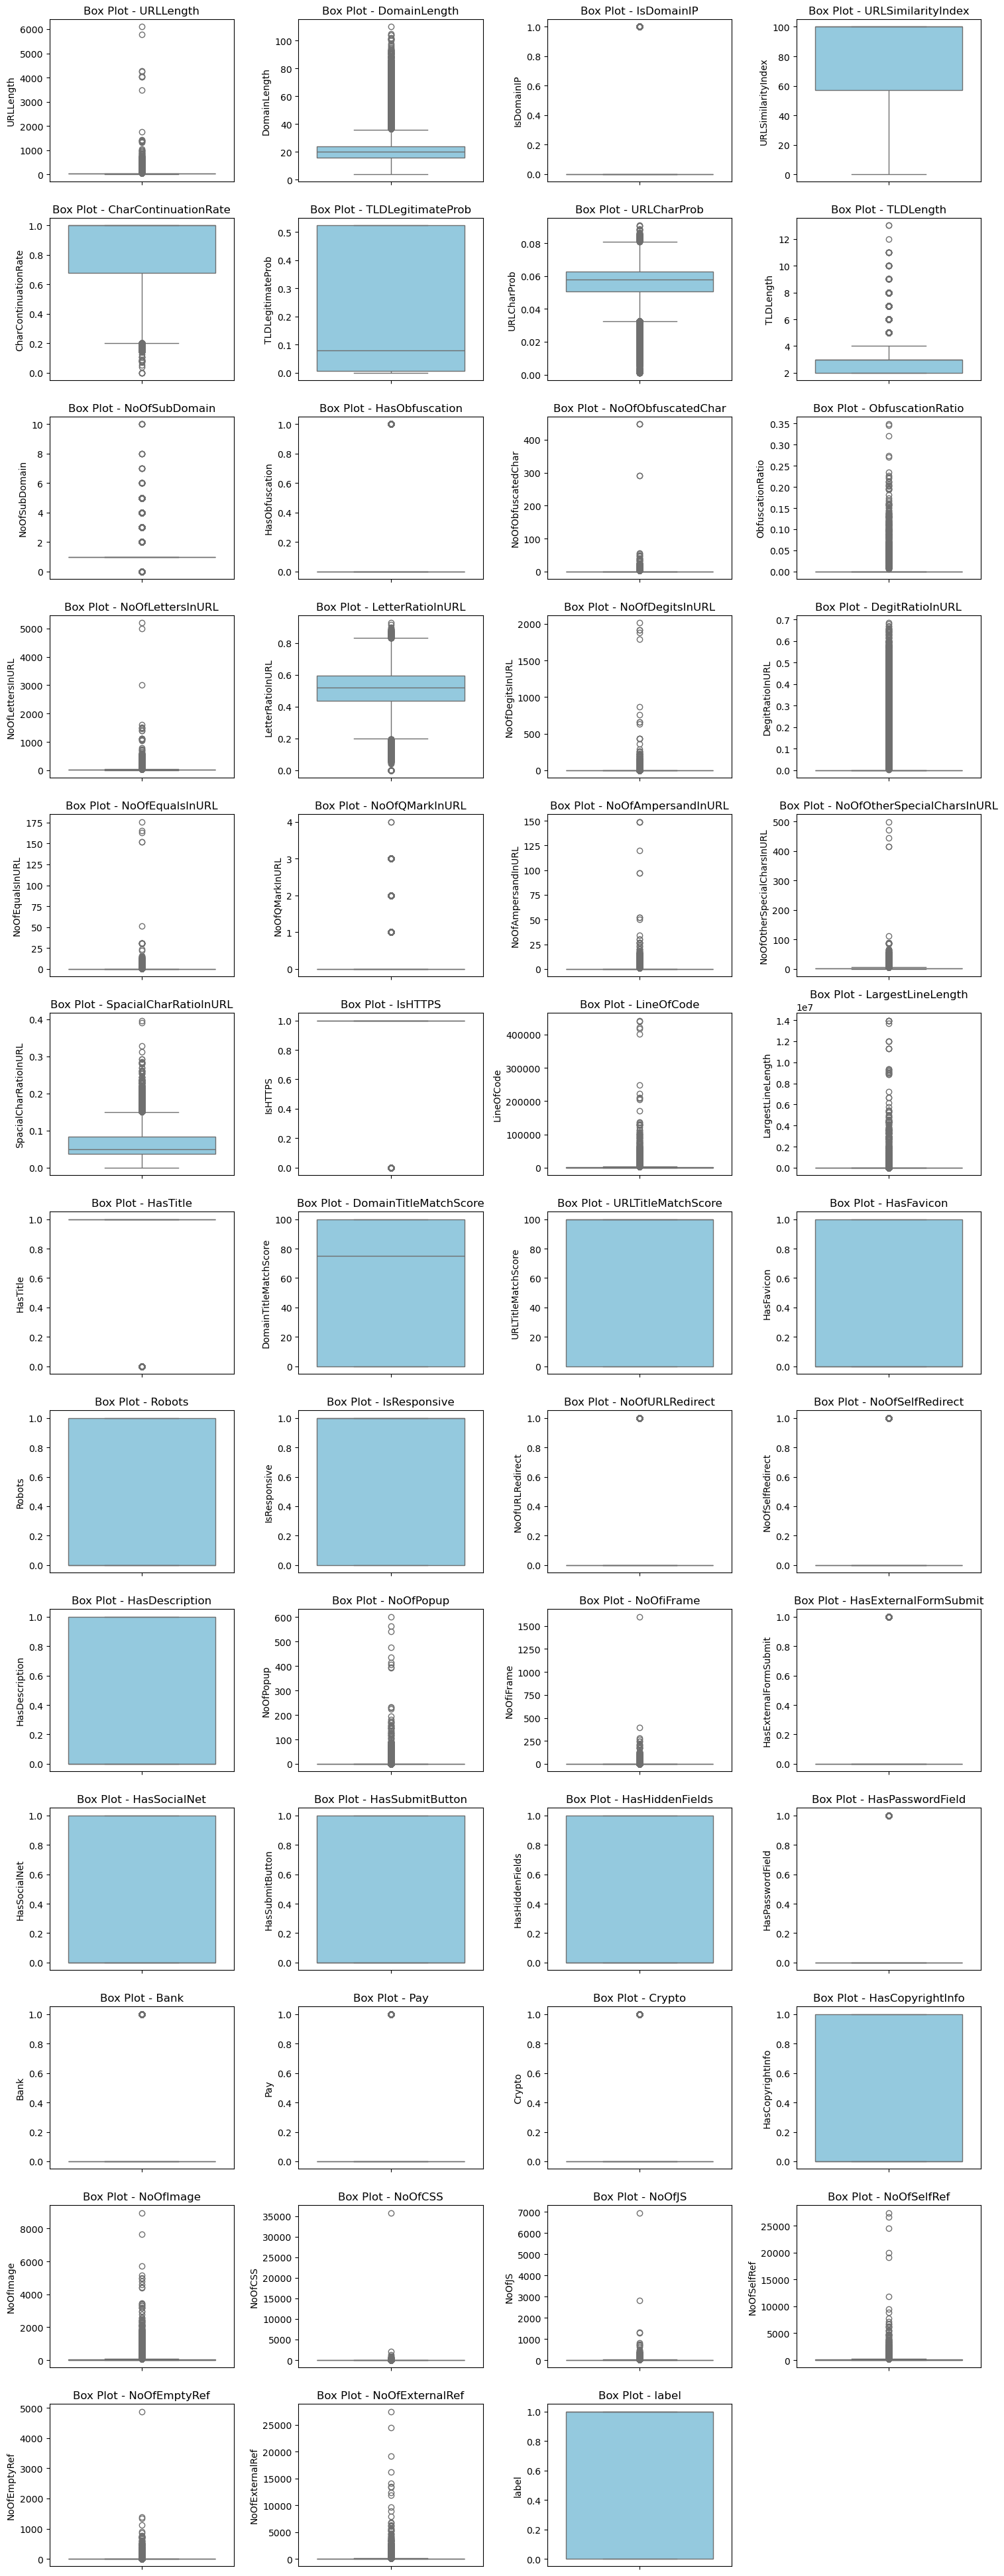

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Box plots for outlier detection
n_cols = 4  # Number of columns per row
n_rows = int(np.ceil(len(numeric_cols) / n_cols))  # Dynamically calculate rows

plt.figure(figsize=(15, n_rows * 3))

for i, col in enumerate(numeric_cols, 1):  # Start enumerate from 1 for subplot indexing
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Box Plot - {col}')

plt.tight_layout()  # Adjust subplot spacing
plt.show()


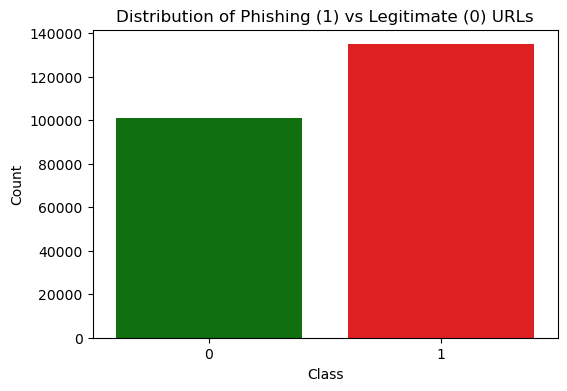

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'], hue=df['label'], palette={0: "green", 1: "red"}, legend=False)
plt.title("Distribution of Phishing (1) vs Legitimate (0) URLs")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


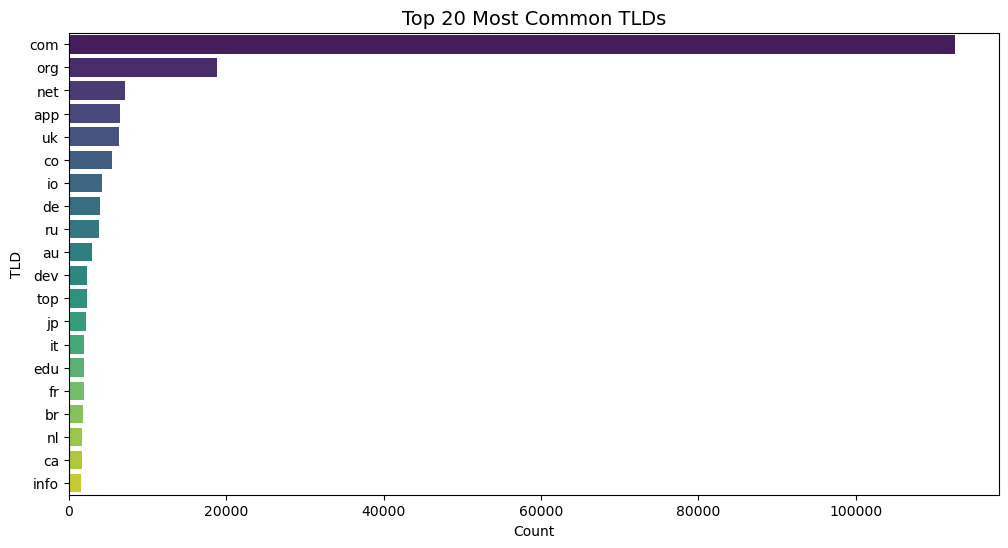

In [18]:
# Get the top 20 TLDs
top_20_tlds = df['TLD'].value_counts().nlargest(20)

# Bar Chart for Top 20 TLDs
plt.figure(figsize=(12, 6))
sns.barplot(y=top_20_tlds.index, x=top_20_tlds.values, palette="viridis", hue=top_20_tlds.index, dodge=False)
plt.legend([],[], frameon=False)  # Hide legend
plt.title("Top 20 Most Common TLDs", fontsize=14)
plt.xlabel("Count")
plt.ylabel("TLD")
plt.show()


### Observations:

1. **Histograms for Numerical Columns:**
   - Right-skewed distributions observed in many features like `URLLength`, `NoOfImage`, `NoOfJS`, and `NoOfCSS`, indicating the presence of long-tailed values.
   - Features like `URLLength` and `DomainLength` show peaks, suggesting most URLs are short, but some are extremely long, possibly outliers.

2. **Box Plots (Outlier Detection):**
   - Several features (`NoOfImage`, `NoOfJS`, `URLLength`, `NoOfCSS`) show distinct outliers, indicating URLs with unusual content or structure. These need to be handled in preprocessing.

3. **Distribution of Phishing vs Legitimate URLs:**
   - Slight class imbalance with 57% legitimate URLs (`label = 0`) and 43% phishing URLs (`label = 1`). The distribution is fairly balanced, with no extreme skewness.

4. **Top 20 TLDs:**
   - `.com`, `.org`, `.net` are the most common TLDs. Some less common TLDs may indicate phishing URLs, providing potential patterns for further analysis.




**Save the Original URLs:**
   - We save the original URL column before any modifications, which will be useful for traceability or reprocessing if needed.


In [21]:
urls = df["URL"].copy().reset_index(drop=True)

In [22]:
df1 = df.drop(columns=['FILENAME', 'URL', 'Title', 'Domain', 'TLD'], axis=1)


In [23]:
print(df1.columns)


Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')


### Remaining Columns After Dropping Irrelevant Ones:

After removing columns such as `FILENAME`, `URL`, `Title`, `Domain`, and `TLD`, the following relevant columns are left for further analysis and model building:

- **URL-related features**: 
  - `URLLength`, `DomainLength`, `URLSimilarityIndex`, `CharContinuationRate`, `URLCharProb`, `TLDLength`, `IsHTTPS`, etc.
  
- **Obfuscation-related features**: 
  - `HasObfuscation`, `NoOfObfuscatedChar`, `ObfuscationRatio`, etc.

- **URL content-related features**: 
  - `NoOfSubDomain`, `NoOfEqualsInURL`, `NoOfQMarkInURL`, `NoOfAmpersandInURL`, `NoOfOtherSpecialCharsInURL`, etc.

- **Webpage features**: 
  - `HasTitle`, `DomainTitleMatchScore`, `URLTitleMatchScore`, `HasFavicon`, `Robots`, `IsResponsive`, etc.

- **Form-related features**: 
  - `HasExternalFormSubmit`, `HasSocialNet`, `HasSubmitButton`, `HasHiddenFields`, `HasPasswordField`, etc.

- **Payment-related features**: 
  - `Bank`, `Pay`, `Crypto`, `HasCopyrightInfo`, etc.

- **Multimedia features**: 
  - `NoOfImage`, `NoOfCSS`, `NoOfJS`, `NoOfSelfRef`, `NoOfEmptyRef`, `NoOfExternalRef`.

- **Target Variable**: 
  - `label` (Phishing or Legitimate URLs).


In [25]:
df1.select_dtypes(include=[np.number]).skew().sort_values(ascending=True)


HasTitle                       -2.090195
IsHTTPS                        -1.370443
CharContinuationRate           -1.128591
URLCharProb                    -1.064291
URLSimilarityIndex             -0.989903
IsResponsive                   -0.514255
label                          -0.290602
URLTitleMatchScore             -0.089085
LetterRatioInURL               -0.066358
DomainTitleMatchScore          -0.008735
HasCopyrightInfo                0.052921
TLDLegitimateProb               0.073090
HasSocialNet                    0.174379
HasDescription                  0.241000
HasSubmitButton                 0.347949
HasHiddenFields                 0.504096
HasFavicon                      0.575358
Robots                          1.056024
SpacialCharRatioInURL           1.184134
Pay                             1.236906
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfURLRedirect                 2.155960
Bank                            2.239229
DomainLength    

In [26]:
# Select only numerical columns
numerical_features = df1.select_dtypes(include=[np.number])

# Function to detect outliers using IQR
def detect_outliers(df1):
    outlier_counts = {}
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    for col in df1.columns:
        outliers = ((df1[col] < lower_bound[col]) | (df1[col] > upper_bound[col]))
        count = outliers.sum()
        if count > 0:
            outlier_counts[col] = count

    return outlier_counts

# Get outlier feature count
outlier_dict = detect_outliers(numerical_features)

# Display number of outliers per feature
print("Outlier Counts per Feature:")
for feature, count in outlier_dict.items():
    print(f"{feature}: {count} outliers")


Outlier Counts per Feature:
URLLength: 22493 outliers
DomainLength: 13474 outliers
IsDomainIP: 638 outliers
CharContinuationRate: 679 outliers
URLCharProb: 8569 outliers
TLDLength: 2134 outliers
NoOfSubDomain: 57389 outliers
HasObfuscation: 485 outliers
NoOfObfuscatedChar: 485 outliers
ObfuscationRatio: 485 outliers
NoOfLettersInURL: 19662 outliers
LetterRatioInURL: 1417 outliers
NoOfDegitsInURL: 51461 outliers
DegitRatioInURL: 51461 outliers
NoOfEqualsInURL: 5401 outliers
NoOfQMarkInURL: 6130 outliers
NoOfAmpersandInURL: 887 outliers
NoOfOtherSpecialCharsInURL: 12380 outliers
SpacialCharRatioInURL: 3344 outliers
IsHTTPS: 51256 outliers
LineOfCode: 19280 outliers
LargestLineLength: 17503 outliers
HasTitle: 32714 outliers
NoOfURLRedirect: 31464 outliers
NoOfSelfRedirect: 9457 outliers
NoOfPopup: 13411 outliers
NoOfiFrame: 34441 outliers
HasExternalFormSubmit: 10372 outliers
HasPasswordField: 24113 outliers
Bank: 29967 outliers
Pay: 55885 outliers
Crypto: 5535 outliers
NoOfImage: 18362 o

### Why Use IQR for Outlier Detection?

Outliers can skew the performance of machine learning models, especially those sensitive to feature distribution like logistic regression or SVM. The **Interquartile Range (IQR)** method is a robust and widely used statistical technique for detecting outliers.

- **IQR = Q3 - Q1**, where Q1 is the 25th percentile and Q3 is the 75th percentile.
- Any value below **Q1 - 1.5 × IQR** or above **Q3 + 1.5 × IQR** is considered an outlier.
- IQR is preferred over methods like standard deviation when dealing with skewed data, as it is less affected by extreme values.

We apply IQR to each numeric column in the dataset to detect and later manage these outliers (e.g., clipping, transformation).

---

### Observation: Skewness and Outliers

#### Skewness Summary:
- Multiple features exhibit **high right skew**, such as:
  - `NoOfCSS` (464), `NoOfObfuscatedChar` (204), `NoOfJS` (140), `NoOfEqualsInURL` (114), `NoOfEmptyRef` (106), etc.
- This suggests that most data points are concentrated near smaller values with a few extreme large values.
- These features need transformation (Box-Cox, square, etc.) to improve learning efficiency and reduce model bias.

#### Outlier Detection (IQR Results):
- Features like `NoOfSubDomain`, `NoOfDegitsInURL`, `Pay`, and `IsHTTPS` have **tens of thousands** of outliers.
- Even structural features like `URLLength`, `DomainLength`, and `LineOfCode` contain significant outliers.
- Binary features (like `IsHTTPS`, `HasObfuscation`) still show as outliers due to their sparse 0/1 distributions, but we typically don't treat binary columns for outliers.

#### Implication:
- These outliers could introduce **noise or misleading patterns** into the model.
- They will be addressed through **clipping (IQR capping)** and **transformation (e.g., Box-Cox for right skew, square for left skew)** in the upcoming steps.


In [28]:
# Identify binary columns
binary_col = [col for col in df1.columns if df1[col].nunique() == 2]
print("Binary columns:", binary_col)

# Identify non-binary columns
not_binary = [col for col in df1.columns if df1[col].nunique() > 2]
print("Non-binary columns:", not_binary)


Binary columns: ['IsDomainIP', 'HasObfuscation', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'label']
Non-binary columns: ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']


### Binary vs Non-Binary Features

- **Binary columns** (20 total): These features contain only 0s and 1s, often representing presence/absence, true/false, or yes/no characteristics. Examples: `IsHTTPS`, `HasTitle`, `IsDomainIP`, etc.
  
- **Non-binary columns** (31 total): These are continuous/numeric features with a wide range of values. Examples: `URLLength`, `DomainLength`, `LineOfCode`, etc.

This step helps in deciding transformation techniques — we typically apply **skew correction** and **scaling** only to non-binary features.


In [30]:
# Find right-skewed columns
right_skewed = df1[not_binary].skew()[df1[not_binary].skew() > 0.05].index.tolist()
print("Right Skewed Columns:")
print(right_skewed)

# View skewness values
print("\nSkewness of Right-Skewed Features:")
print(df1[right_skewed].skew())


Right Skewed Columns:
['URLLength', 'DomainLength', 'TLDLegitimateProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']

Skewness of Right-Skewed Features:
URLLength                      53.321737
DomainLength                    2.513397
TLDLegitimateProb               0.073090
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmper

### Skewness Detection in Non-Binary Features

- **Total Right-Skewed Features**: 25
- These features show high positive skewness, meaning their values are concentrated on the left with long tails to the right.
- Some highly skewed examples:
  - `NoOfCSS`: 464.40
  - `NoOfObfuscatedChar`: 204.68
  - `NoOfJS`: 140.43
  - `NoOfDegitsInURL`: 94.87
  - `URLLength`: 53.32

> Highly skewed features can mislead model learning, so transformation is necessary.


In [32]:
import numpy as np

# Apply log1p transformation to the skewed features
df1[right_skewed] = df1[right_skewed].apply(np.log1p)

# Re-check skewness after transformation
print("Skewness after Log Transformation:")
print(df1[right_skewed].skew())


Skewness after Log Transformation:
URLLength                      2.291953
DomainLength                   0.418945
TLDLegitimateProb              0.065404
TLDLength                      0.173867
NoOfSubDomain                 -0.229078
NoOfObfuscatedChar            27.402822
ObfuscationRatio              37.719748
NoOfLettersInURL               0.990197
NoOfDegitsInURL                2.215377
DegitRatioInURL                2.950022
NoOfEqualsInURL                8.844134
NoOfQMarkInURL                 6.559817
NoOfAmpersandInURL            22.148087
NoOfOtherSpecialCharsInURL     1.605513
SpacialCharRatioInURL          1.117398
LineOfCode                    -0.473375
LargestLineLength              0.108537
NoOfPopup                      6.921519
NoOfiFrame                     1.812818
NoOfImage                      0.166332
NoOfCSS                        0.504141
NoOfJS                         0.050043
NoOfSelfRef                    0.125027
NoOfEmptyRef                   2.063104
NoOfE

### Skewness After Log Transformation

- **Skewness Values**: 
  - The transformation helped reduce skewness across most of the features.
  - Features like `NoOfSubDomain`, `NoOfObfuscatedChar`, and `ObfuscationRatio` still exhibit some skewness but have been reduced significantly.
  - Features like `URLLength`, `DomainLength`, `NoOfLettersInURL`, and `LineOfCode` now have close to normal or near-zero skewness.
  - Features like `NoOfImage`, `NoOfJS`, and `NoOfCSS` have improved towards more symmetric distributions.
  

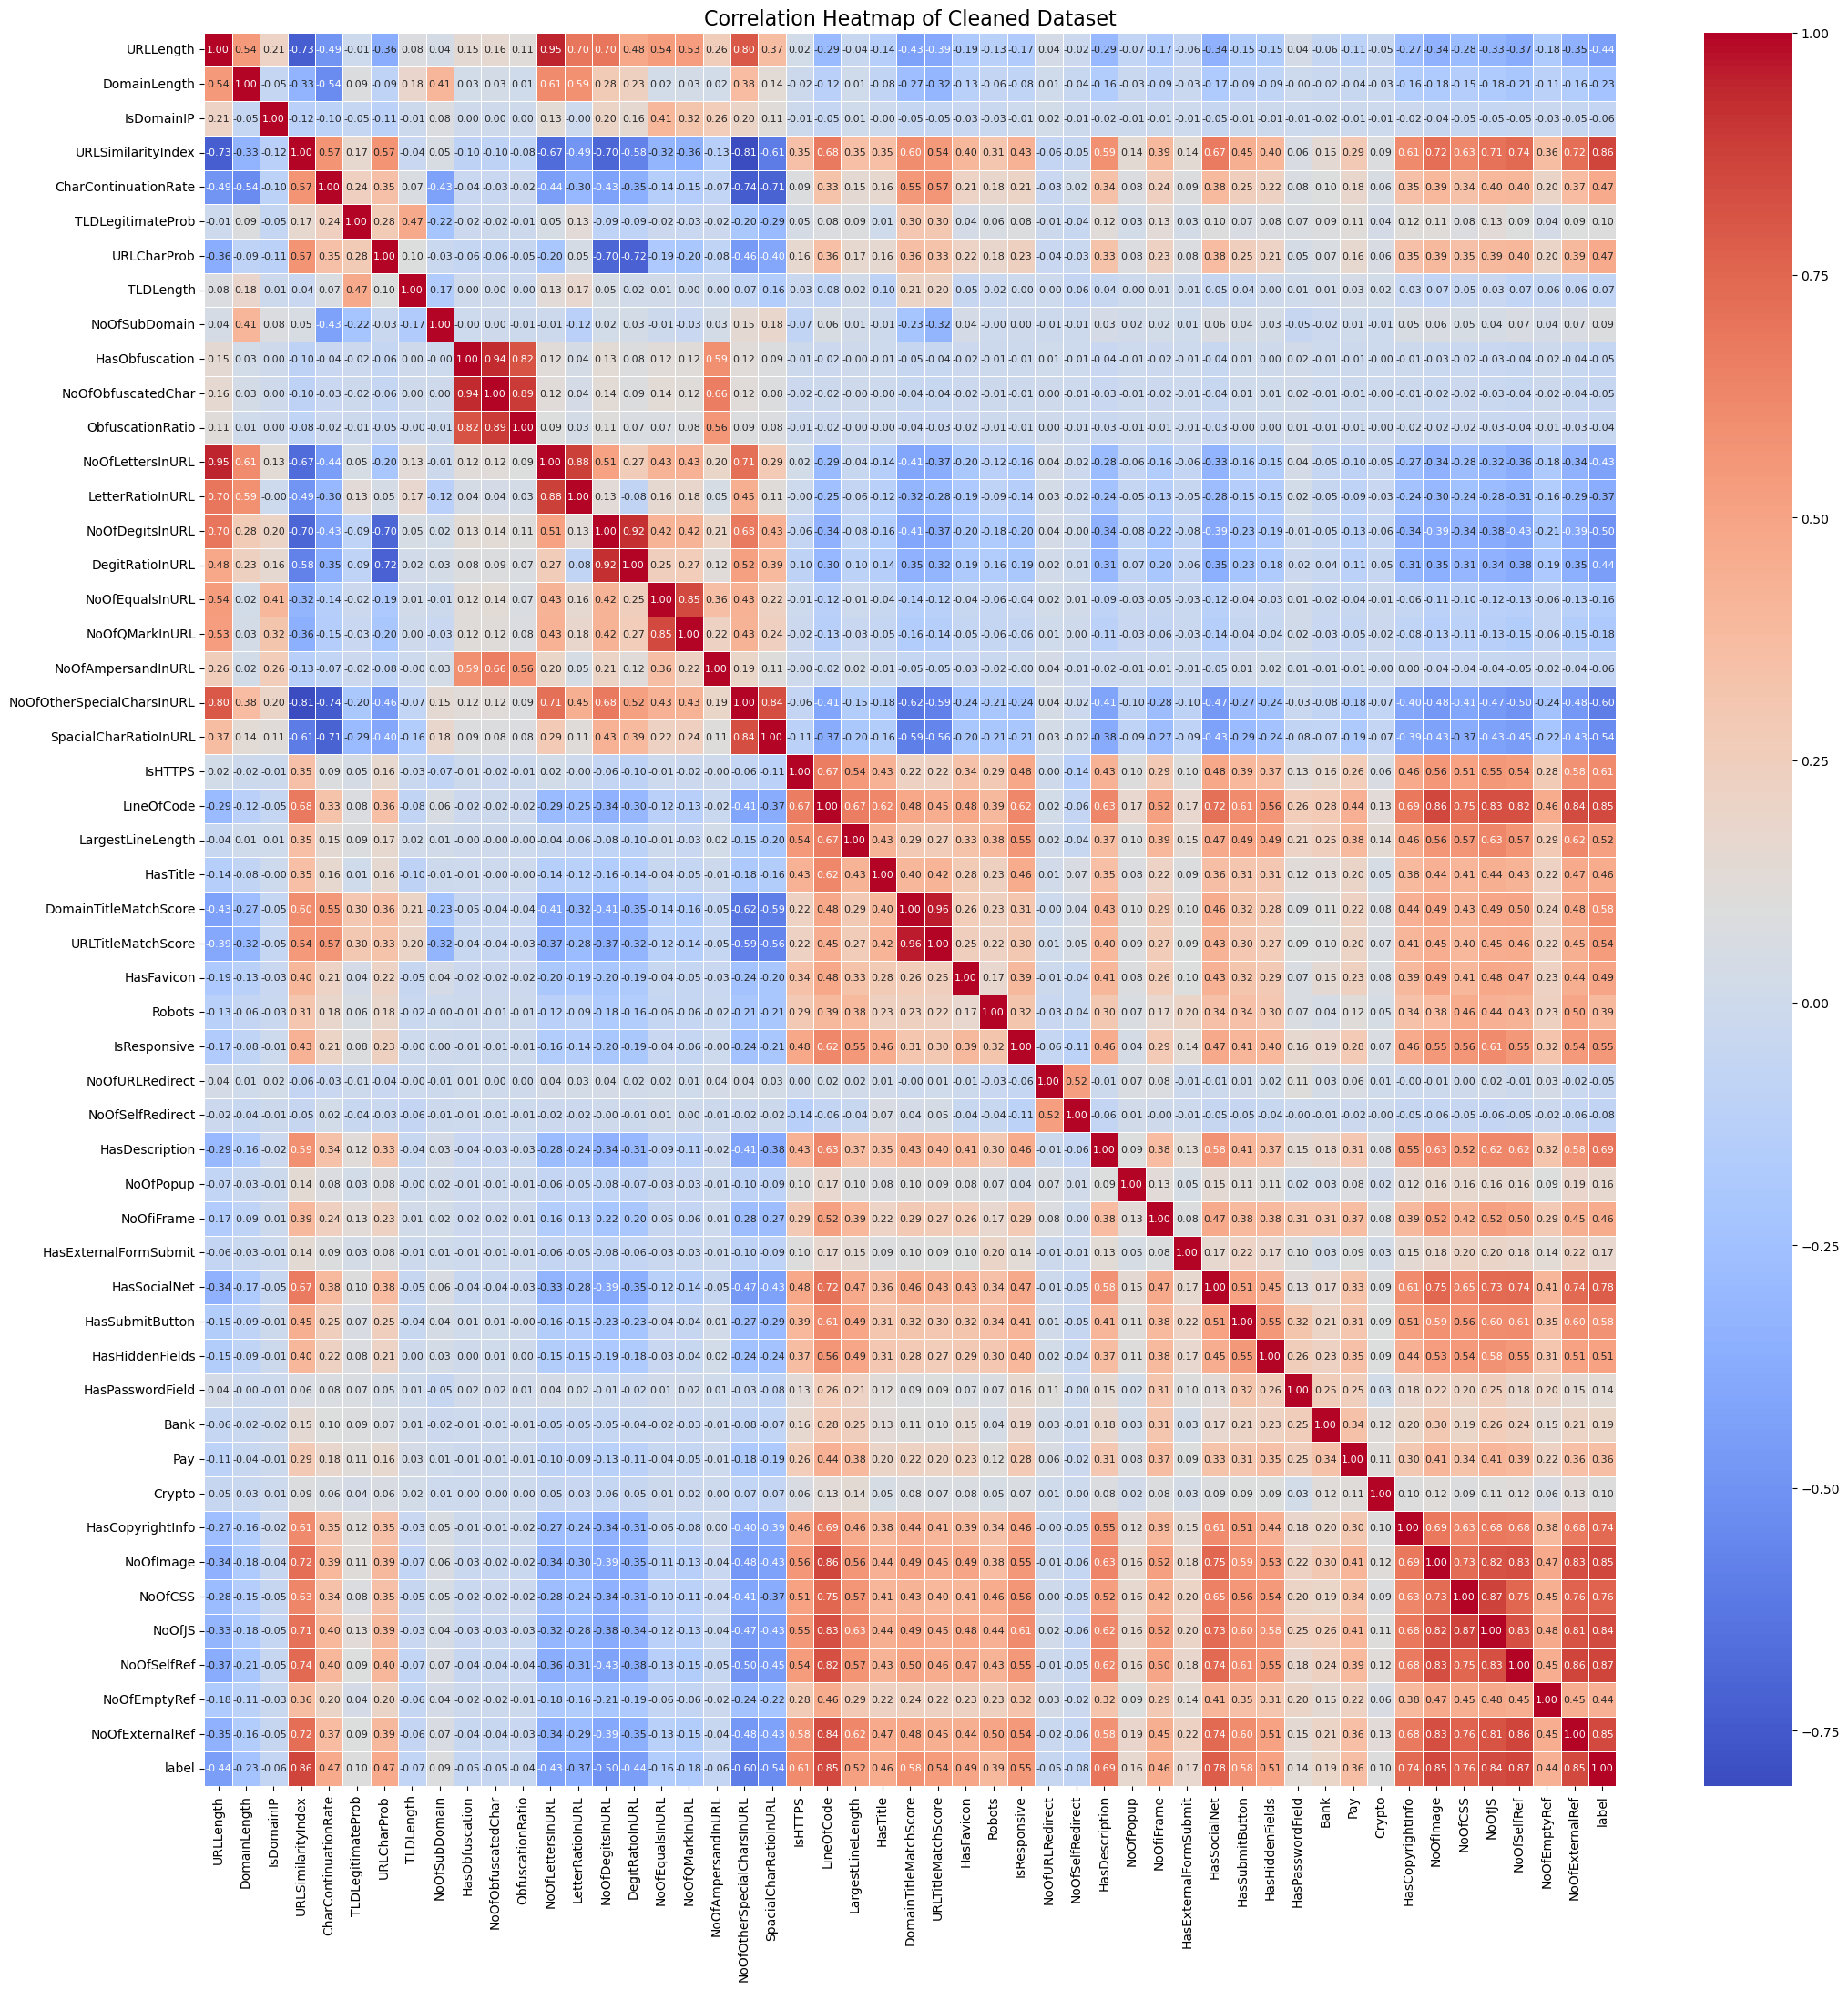

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df1.corr()

# Set up the figure for the heatmap
plt.figure(figsize=(25, 25))

# Create a heatmap with correlation values displayed
sns.heatmap(
    correlation_matrix, 
    cmap='coolwarm', 
    annot=True,  # Display correlation values
    fmt=".2f",  # Format decimal places
    linewidths=0.5,
    annot_kws={"size": 8}  # Set annotation font size
)

# Set the title and display the plot
plt.title("Correlation Heatmap of Cleaned Dataset", fontsize=16)
plt.show()


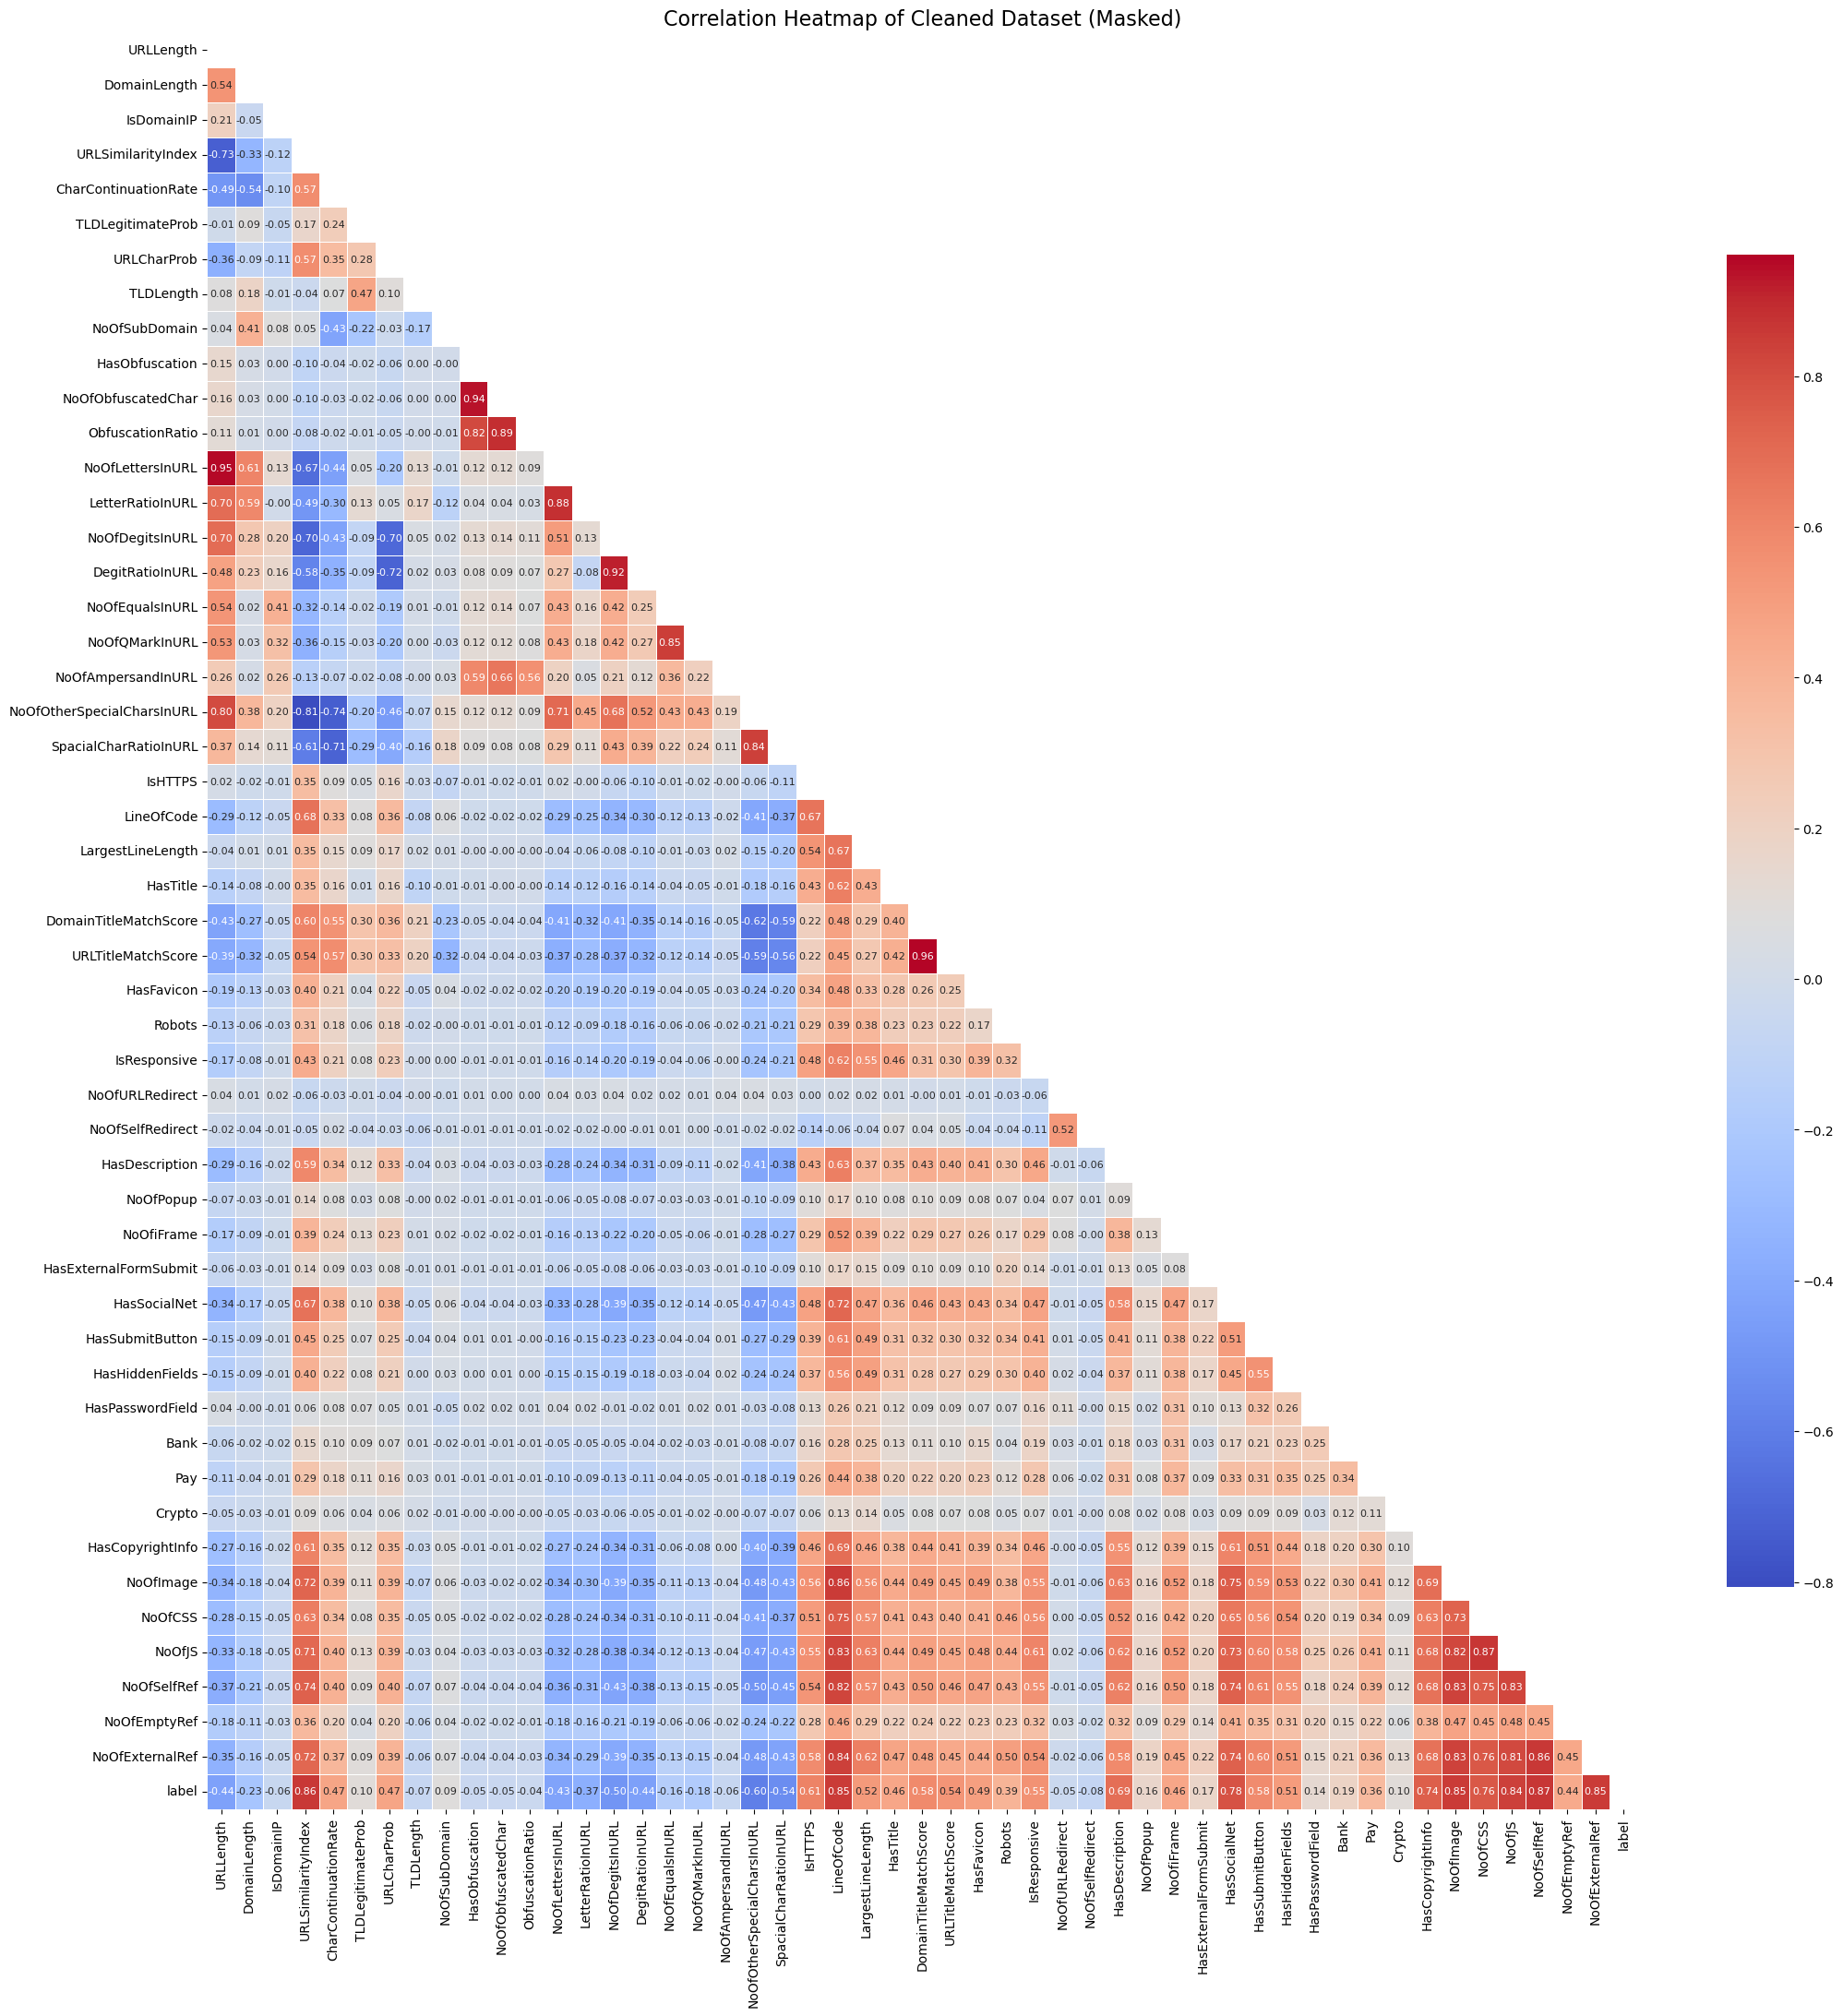

In [35]:
# Mask the upper triangle of the correlation matrix to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(25, 25))
sns.heatmap(
    correlation_matrix, 
    cmap='coolwarm', 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    annot_kws={"size": 8}, 
    mask=mask,  # Apply the mask
    cbar_kws={"shrink": 0.75}  # Adjust color bar size
)

plt.title("Correlation Heatmap of Cleaned Dataset (Masked)", fontsize=16)
plt.show()


### Correlation Matrix

The correlation matrix provides insights into the linear relationships between all the features in the dataset. It measures how strongly the features are related to each other, with values ranging from -1 to 1:
- **1** indicates a perfect positive correlation, meaning that as one feature increases, the other does as well.
- **-1** indicates a perfect negative correlation, meaning that as one feature increases, the other decreases.
- **0** indicates no correlation, meaning that changes in one feature do not relate to changes in the other.

The correlation matrix helps identify pairs of features that are highly correlated, which may suggest potential multicollinearity or redundant features in the dataset. Features with high correlation (close to 1 or -1) might need to be reviewed or adjusted, as they may not add much new information when used together in the model.

---

### Masked Correlation Matrix

The masked correlation matrix is a variant of the standard correlation matrix, where the redundant values (since the correlation matrix is symmetrical) are hidden. This makes the visualization cleaner and easier to read, as it eliminates the repetitive upper or lower triangle of the matrix.

By using a mask, we can focus only on the unique correlations between features, which helps in understanding which features are more likely to be relevant for further analysis or model building. The masked correlation matrix is especially useful for large datasets with many features, as it improves readability without losing any information about the relationships between the features.


In [37]:
import numpy as np

# Set the correlation threshold
correlation_threshold = 0.85

# Create the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find columns with any correlation value greater than the threshold
highly_correlated_features = [col for col in upper_triangle.columns if any(upper_triangle[col] > correlation_threshold)]

# Print the features to be dropped
print("Highly correlated features to be dropped:")
print(highly_correlated_features)

# Drop these features from the dataset
df_reduced = df1.drop(columns=highly_correlated_features)

# Confirm shape after dropping
print(f"Shape after dropping correlated features: {df_reduced.shape}")


Highly correlated features to be dropped:
['NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'DegitRatioInURL', 'NoOfQMarkInURL', 'URLTitleMatchScore', 'NoOfImage', 'NoOfJS', 'NoOfExternalRef', 'label']
Shape after dropping correlated features: (235795, 40)


In [38]:
print("Remaining features:")
print(df_reduced.columns.tolist())


Remaining features:
['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfDegitsInURL', 'NoOfEqualsInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfCSS', 'NoOfSelfRef', 'NoOfEmptyRef']


### Correlation Analysis and Feature Reduction

To ensure that our model performs well and is not affected by **multicollinearity** (where two or more features are highly correlated with each other), we performed a **correlation analysis** on the cleaned dataset before scaling. A heatmap was plotted to visualize the correlation matrix.

We then used a **correlation threshold of 0.85** to identify highly correlated features. Features that showed a correlation higher than this threshold with one or more other features were considered redundant and hence dropped. 

#### Purpose of this step:
- **Improve model performance** by reducing noisy and redundant features.
- **Prevent overfitting** due to duplicated or similar information.
- **Enhance interpretability** by keeping only the most informative features.

#### Features dropped due to high correlation:
- `NoOfLettersInURL`  
- `LetterRatioInURL`  
- `SpacialCharRatioInURL`  
- `URLTitleMatchScore`  
- `NoOfJS`  
- `NoOfExternalRef`  
- `label` *(target column was excluded from feature list for modeling)*

After dropping these features, we were left with **39 features**, which will now be used for **scaling and model training**.


In [40]:
# Load the original dataset
import pandas as pd

df_cleaned = df.copy()  # Create a cleaned version of your dataset

df_cleaned.drop(columns=['URLSimilarityIndex', 'NoOfSelfRef', 'NoOfImage', 'LetterRatioInURL', 'NoOfJS', 'NoOfExternalRef', 'SpacialCharRatioInURL', 'URLTitleMatchScore'], inplace=True)



In [41]:
df_cleaned.info()  # Shows basic details like columns, non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [42]:
df_cleaned.head()  # Displays the first 5 rows of the dataset


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfCSS,NoOfEmptyRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,1.000000,0.522907,0.061933,...,1,1,0,1,0,0,1,20,0,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,0.666667,0.032650,0.050207,...,1,0,0,0,0,0,1,9,0,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,0.866667,0.028555,0.064129,...,1,1,0,0,0,0,1,2,2,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,1.000000,0.522907,0.057606,...,1,1,0,0,1,1,1,27,1,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,1.000000,0.079963,0.059441,...,1,1,0,1,1,0,1,15,1,1


In [43]:
print(df_cleaned.columns)


Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb',
       'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfCSS', 'NoOfEmptyRef', 'label'],
      dtype='object')


### Split the Data into Training and Testing Sets

In machine learning, it’s crucial to evaluate the model on data that it hasn’t seen during training. Therefore, we separate the features (X) and the target variable (y) from the cleaned dataset and then split the data into training and testing sets. 

This is done to ensure that the model is trained on one portion of the data (80% for training) and evaluated on another (20% for testing). By doing so, we can assess how well the model generalizes to new, unseen data.

The purpose of this step is to:
- Train the model on a subset of the data, allowing it to learn the patterns.
- Test the model on a different subset to evaluate its performance and prevent overfitting.

This split helps in determining how well the model will perform in real-world scenarios, where the data will be unseen during training.


In [45]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_cleaned.drop(columns=['label'])
y = df_cleaned['label']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (188636, 47)
Testing data shape: (47159, 47)


In [46]:
print(df_cleaned.columns)

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb',
       'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfCSS', 'NoOfEmptyRef', 'label'],
      dtype='object')


In [47]:
print(X_train.columns)


Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb',
       'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS',
       'LineOfCode', 'LargestLineLength', 'HasTitle', 'Title',
       'DomainTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive',
       'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup',
       'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet',
       'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay',
       'Crypto', 'HasCopyrightInfo', 'NoOfCSS', 'NoOfEmptyRef'],
      dtype='object')


In [48]:
# Drop 'label' and other non-numeric columns
columns_to_drop = ['label', 'FILENAME', 'URL', 'Domain', 'TLD', 'Title']
X = df_cleaned.drop(columns=columns_to_drop)
y = df_cleaned['label']

# Split the data (this will now only have numeric columns in X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)


Training data shape: (188636, 42)


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Apply PCA for Dimensionality Reduction

Principal Component Analysis (PCA) is a technique used for dimensionality reduction. It transforms the features of the dataset into a new set of variables called "principal components," which are linear combinations of the original features. The goal of PCA is to reduce the number of features while preserving as much of the original variance as possible.

In this step, we use PCA to retain 95% of the variance in the dataset. This means that PCA will reduce the dimensionality of the data such that 95% of the original variance is retained in the new features (principal components), while the remaining 5% can be discarded.

### Why PCA is used:
- **Dimensionality Reduction:** With a large number of features, the dataset can become too complex and difficult to visualize or process effectively. PCA helps reduce the complexity of the data, making it easier to work with without losing significant information.
  
- **Improves Model Efficiency:** Reducing the number of features makes the model faster and more efficient, as there are fewer variables to consider. This can help in both training and prediction times.

- **Prevents Overfitting:** By reducing the number of features, PCA can help prevent overfitting. With fewer features, there are fewer chances for the model to learn noise or irrelevant patterns in the data.

- **Feature Uncorrelation:** PCA ensures that the new features (principal components) are uncorrelated, which is often an assumption in many machine learning algorithms. This can help the model to better understand the relationships in the data.

### Why Retain Variance:
The 95% variance criterion is used to ensure that a large portion of the information from the original dataset is retained after dimensionality reduction. By selecting the number of components that explain 95% of the variance, we ensure that we keep the most important features of the dataset while discarding the less significant ones (the ones that explain less of the variance).

This process helps to:
- **Keep most of the important information:** The variance in the data often reflects the "important" information. By retaining the variance, we ensure that we are keeping the parts of the data that contribute most to its variability.
  
- **Reduce Noise:** Smaller, less significant features (which contribute less to the variance) can often be noisy or irrelevant. By reducing the number of features, we reduce the chance of the model being influenced by this noise.

By applying PCA, we not only reduce the number of features but also ensure that the model focuses on the most important and informative parts of the data.


In [51]:
from sklearn.decomposition import PCA

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Original number of features:", X_train.shape[1])
print("Reduced number of features after PCA:", X_train_pca.shape[1])


Original number of features: 42
Reduced number of features after PCA: 32


### Feature Selection Using SelectKBest

Feature selection is an essential process in machine learning that involves selecting the most relevant features from the dataset, helping improve model performance and reducing computational cost. In this step, we apply feature selection using **SelectKBest** with the **f_classif** score function.

#### Why Feature Selection is Important:
- **Improves Model Performance:** By selecting only the most relevant features, we reduce the complexity of the model, making it more efficient. This helps prevent overfitting, as the model is less likely to capture noise or irrelevant patterns in the data.
  
- **Reduces Dimensionality:** Even after applying PCA, there may still be redundant or less informative features. Feature selection helps further reduce the number of features, improving model interpretability and computation speed.

- **Enhances Generalization:** By removing irrelevant features, we allow the model to focus on the most important patterns in the data, leading to better performance on unseen data.

#### Why **f_classif** and **SelectKBest**:
- **f_classif:** This is the ANOVA F-value, which is used to measure the relationship between each feature and the target variable. The larger the F-value, the more significant the feature is in predicting the target. We use **f_classif** to compute feature scores, which helps identify which features have the strongest relationship with the target variable.
  
- **SelectKBest:** This is a feature selection method that selects the top **k** features based on their scores. By using **SelectKBest** with the **f_classif** score function, we ensure that the selected features have the highest influence on the target variable. In this case, we select the top 24 features, but the number of selected features can be adjusted depending on the dataset and the model's needs.

#### How This Helps:
- **Reducing Noise:** Not all features are relevant to the target variable. By selecting only the most important features, we reduce the chance of including noise or irrelevant information, which can hurt the model's ability to generalize.
  
- **Improving Model Interpretability:** With fewer features, the model becomes easier to understand. This is especially important in applications where transparency is required.

- **Faster Computation:** Reducing the number of features decreases the computational complexity, making the training and prediction times faster. This is beneficial for large datasets.

#### Output Analysis:
The **feature scores** computed by **f_classif** allow us to rank features based on their importance. By sorting the features in descending order of their scores, we can clearly see which features have the highest impact on the target variable. Selecting the top features based on this ranking ensures that we are using the most relevant data for training the model.

In conclusion, feature selection helps to improve the efficiency and performance of the model by focusing on the most informative features while discarding irrelevant ones. This step is crucial for ensuring that the model is both accurate and computationally efficient.


In [114]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_pca), columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_test_scaled = pd.DataFrame(scaler.transform(X_test_pca), columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])

# Compute feature scores using f_classif (ANOVA F-value for feature selection)
feature_scores = f_classif(X_train_scaled, y_train)[0]

# Custom feature scores (if needed, otherwise skip this)


# Select the top k features (e.g., top 24 features, you can adjust k)
selector = SelectKBest(score_func=lambda X, y: (feature_scores, None), k=24)
X_train_selected = pd.DataFrame(selector.fit_transform(X_train_scaled, y_train), 
                                columns=selector.get_feature_names_out())
X_test_selected = pd.DataFrame(selector.transform(X_test_scaled), 
                               columns=selector.get_feature_names_out())

# Create a DataFrame showing feature names and their corresponding scores
feature_scores_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Score': feature_scores
})

# Sort features by score in descending order
feature_scores_sorted = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the top selected features with scores
print("\nTop Selected Features with Scores:")
print(feature_scores_sorted.head(25))



Top Selected Features with Scores:
   Feature          Score
0      PC1  316263.225084
1      PC2   32177.281502
4      PC5    6461.148944
24    PC25    2182.818723
17    PC18    1221.349813
9     PC10    1000.164336
23    PC24     932.526932
15    PC16     870.475062
6      PC7     803.370624
25    PC26     673.614587
3      PC4     562.500757
5      PC6     533.742225
31    PC32     497.316863
22    PC23     385.778903
27    PC28     293.929233
2      PC3     218.377918
21    PC22     210.799519
28    PC29     193.602432
30    PC31     159.770290
18    PC19     153.028321
10    PC11     121.727027
7      PC8     104.847693
26    PC27     102.902509
19    PC20      40.886540
13    PC14      33.377941


### Step 4: Analysis of Top Selected Features with Scores

After performing feature selection, we obtained the following list of the top 24 features based on their **ANOVA F-value scores**. These features are ranked based on their importance in predicting the target variable, where higher scores indicate more significant features. 

#### Top Selected Features with Their Scores:
The following table lists the top selected features (principal components after PCA) along with their corresponding scores:

| Feature | Score            |
|---------|------------------|
| PC1     | 316263.225084    |
| PC2     | 32177.281502     |
| PC5     | 6461.148944      |
| PC25    | 2182.818723      |
| PC18    | 1221.349813      |
| PC10    | 1000.164336      |
| PC24    | 932.526932       |
| PC16    | 870.475062       |
| PC7     | 803.370624       |
| PC26    | 673.614587       |
| PC4     | 562.500757       |
| PC6     | 533.742225       |
| PC32    | 497.316863       |
| PC23    | 385.778903       |
| PC28    | 293.929233       |
| PC3     | 218.377918       |
| PC22    | 210.799519       |
| PC29    | 193.602432       |
| PC31    | 159.770290       |
| PC19    | 153.028321       |
| PC11    | 121.727027       |
| PC8     | 104.847693       |
| PC27    | 102.902509       |
| PC20    | 40.886540        |
| PC14    | 33.377941        |

#### Insights from the Results:
- **PC1 and PC2** have the highest scores, which indicates that they are the most significant principal components in terms of variance. These features capture the most important information from the dataset.
- **PC5, PC18, and PC10** also have relatively high scores, showing they contribute significantly to the model's prediction ability. 
- **Features with lower scores** such as **PC14, PC20** and others with smaller values, suggest they have a less significant relationship with the target variable.
  
#### Why These Findings Are Important:
- **Higher Scores Indicate Important Features:** Features with higher scores (e.g., **PC1**, **PC2**) are more informative for the prediction task, meaning they contain more variance related to the target variable. These features are expected to be key drivers in the model's decision-making process.
  
- **Dimensionality Reduction:** By selecting the most relevant features (those with higher scores), we reduce the complexity of the model. This ensures the model is less prone to overfitting, as it is focused on the most informative components.
  
- **Feature Selection Helps Efficiency:** By removing less informative features, we make the model more efficient in terms of computation and interpretability. This allows the model to focus on the principal components that matter the most.

In conclusion, the top selected features from the feature selection process (based on the ANOVA F-value scores) provide insight into which components of the data are most relevant for predicting phishing URLs. By focusing on these features, we ensure the model is both accurate and efficient.


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Initialize Logistic Regression with increased max_iter
model = LogisticRegression(solver='liblinear', max_iter=1000)

# Train the model
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[20001   123]
 [   99 26936]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



## Train Machine Learning Models

We will now train multiple machine learning models using the final selected features from our **PCA + feature selection pipeline**. The goal is to evaluate model performance using metrics such as **accuracy**, **precision**, **recall**, and **F1-score**, and choose the best-performing model for phishing URL prediction.

---

### Models to Train:

1. **Logistic Regression (L1 & L2 Regularization)**  
   - Baseline model.
   - Interpretable and simple.
   - Regularization prevents overfitting.

2. **Decision Tree (with Pruning)**  
   - Easy to visualize and understand.
   - Pruning avoids overfitting and improves generalization.

3. **Random Forest**  
   - Ensemble of decision trees.
   - Reduces overfitting and improves accuracy.
   - Handles imbalanced and noisy data well.

4. **XGBoost**  
   - Advanced gradient boosting algorithm.
   - High performance on structured/tabular data.
   - Often used in competitions due to accuracy.

5. **Support Vector Machine (SVM)**  
   - Works well in high-dimensional spaces.
   - Effective for binary classification problems.
   - Uses kernel tricks for non-linear decision boundaries.

6. **Gradient Boosting**  
   - An ensemble method based on boosting decision trees.
   - High performance for structured/tabular data.
   - Can overfit if not tuned properly, but generally performs well.


In [57]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(penalty='l2', solver='lbfgs', C=.001, max_iter=2000),
    "SVC": SVC(kernel='linear', C=1, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, min_samples_split=5, min_samples_leaf=2, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, colsample_bytree=0.8, subsample=0.8, eval_metric='logloss', random_state=42),
    "Decision Tree" : DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=5, random_state=42)
}

## Train & Evaluate Machine Learning Models

We'll now train each of the selected models using the final selected features from our pipeline. Evaluation will be done using:

- **Accuracy**
- **Precision**
- **Recall**
- **F1-score**
- **Confusion Matrix**

This will help us identify which model performs best for phishing URL prediction.


 Model: Logistic Regression
Accuracy: 0.9889310629996395
Precision: 0.9915093989840941
Recall: 0.9891621971518402
F1 Score: 0.9903344072880791

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20124
           1       0.99      0.99      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



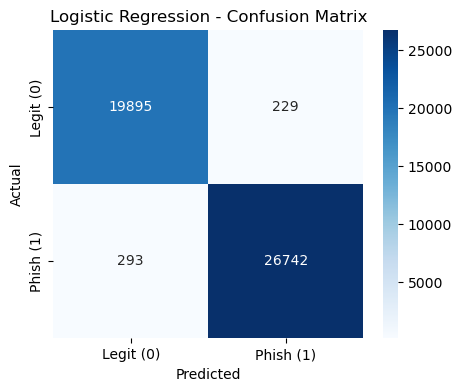

------------------------------------------------------------
 Model: SVC
Accuracy: 0.9962679446129052
Precision: 0.9956449529433474
Recall: 0.9978546328832995
F1 Score: 0.9967485682615924

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



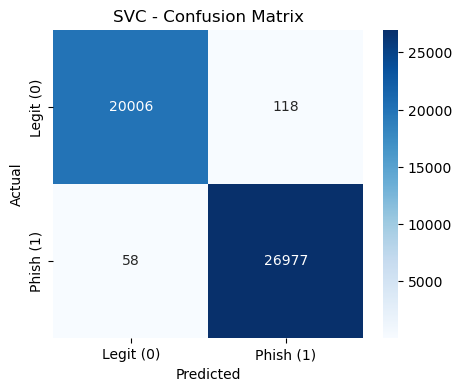

------------------------------------------------------------
 Model: Random Forest
Accuracy: 0.993574927373354
Precision: 0.992592319599027
Recall: 0.9962271130016646
F1 Score: 0.9944063948014547

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20124
           1       0.99      1.00      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



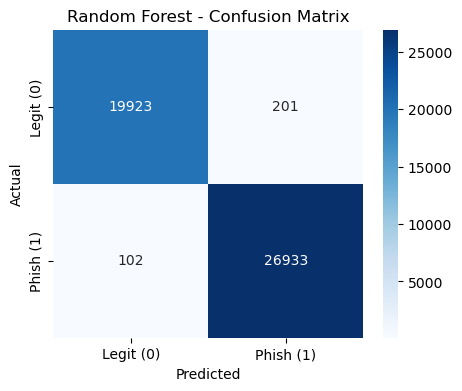

------------------------------------------------------------
 Model: Gradient Boosting
Accuracy: 0.9903093789096461
Precision: 0.9895741231948129
Recall: 0.9935638986498982
F1 Score: 0.9915649975082597

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     20124
           1       0.99      0.99      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



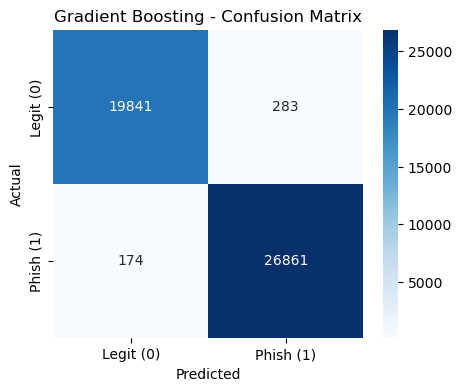

------------------------------------------------------------
 Model: XGBoost
Accuracy: 0.9893975699230264
Precision: 0.98836824088048
Recall: 0.9931940077677085
F1 Score: 0.9907752481458248

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     20124
           1       0.99      0.99      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



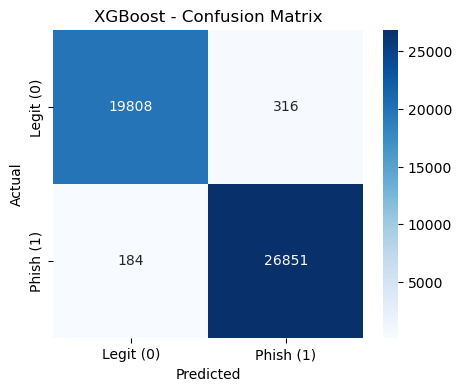

------------------------------------------------------------
 Model: Decision Tree
Accuracy: 0.9888462435590237
Precision: 0.9870292118317104
Recall: 0.9936008877381173
F1 Score: 0.9903041474654378

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     20124
           1       0.99      0.99      0.99     27035

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



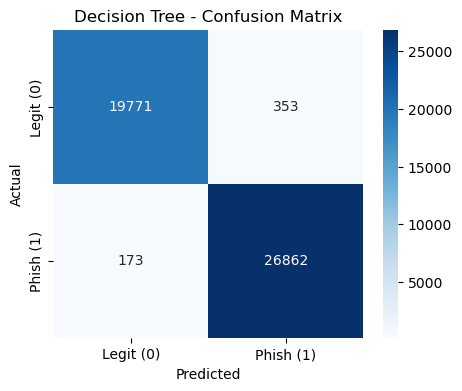

------------------------------------------------------------


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate and display metrics
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f" Model: {name}")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legit (0)", "Phish (1)"], yticklabels=["Legit (0)", "Phish (1)"])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print("-" * 60)

# Evaluate all models
for name, model in models.items():
    evaluate_model(name, model, X_train_selected, y_train, X_test_selected, y_test)


## Model Performance Analysis

### **Key Evaluation Metrics**
- **Accuracy**: Proportion of correctly predicted samples.
- **Precision**: Proportion of true positives out of all predicted positives.
- **Recall**: Proportion of true positives out of all actual positives.
- **F1 Score**: Harmonic mean of precision and recall, balancing both metrics.
- **Classification Report**: Summarizes precision, recall, and F1-score for each class.

### **Model Comparison**

| **Model**             | **Accuracy** | **Precision** | **Recall** | **F1 Score** |
|-----------------------|--------------|---------------|------------|--------------|
| Logistic Regression   | 0.9889       | 0.9915        | 0.9892     | 0.9903       |
| SVC                   | 0.9963       | 0.9956        | 0.9979     | 0.9967       |
| Random Forest         | 0.9936       | 0.9926        | 0.9962     | 0.9944       |
| Gradient Boosting     | 0.9903       | 0.9896        | 0.9936     | 0.9916       |
| XGBoost               | 0.9894       | 0.9884        | 0.9932     | 0.9908       |
| Decision Tree         | 0.9888       | 0.9870        | 0.9936     | 0.9903       |


## Key Takeaways

### **SVC (Support Vector Classifier)**
- **Advantages**:
  - Almost perfect precision and recall.
  - Highest accuracy.
  - Works well in high-dimensional spaces.
- **Disadvantages**:
  - Can be computationally expensive and slow, especially with large datasets.
  - Less interpretable compared to other models.
- **Conclusion**: SVC performs the best in terms of accuracy and precision but may not be the most scalable for larger datasets.

### **Random Forest**
- **Advantages**:
  - High accuracy and balanced precision/recall.
  - Robust to overfitting and noise due to ensemble learning.
  - Handles both linear and non-linear data well.
- **Disadvantages**:
  - Can be computationally intensive for large datasets.
  - Less interpretable than simple models like Logistic Regression or Decision Trees.
- **Conclusion**: Random Forest offers a great balance between performance and interpretability, making it a top choice.

### **Gradient Boosting**
- **Advantages**:
  - High performance, particularly for structured/tabular data.
  - Can improve accuracy with proper hyperparameter tuning.
- **Disadvantages**:
  - Can be prone to overfitting if not carefully tuned.
  - Slower training time compared to Random Forest.
- **Conclusion**: Gradient Boosting is a powerful algorithm but requires careful tuning, which can be time-consuming.

### **Logistic Regression**
- **Advantages**:
  - Simple, interpretable, and fast to train.
  - Works well with linearly separable data.
- **Disadvantages**:
  - Slightly less accurate than ensemble methods (Random Forest, SVC).
  - Sensitive to outliers and may struggle with complex, non-linear relationships.
- **Conclusion**: Logistic Regression is a solid baseline model but lags behind in performance compared to Random Forest and SVC.

### **XGBoost**
- **Advantages**:
  - High performance with proper tuning.
  - Well-suited for structured data and large datasets.
- **Disadvantages**:
  - Computationally expensive.
  - Requires more tuning to achieve optimal performance.
- **Conclusion**: XGBoost is competitive but doesn't outperform Random Forest in this case.

### **Decision Tree**
- **Advantages**:
  - Easy to interpret and visualize.
  - Works well with both categorical and numerical data.
- **Disadvantages**:
  - Prone to overfitting, especially without pruning.
  - Performance can be less stable compared to ensemble methods.
- **Conclusion**: Decision Tree is simple but may suffer from overfitting, making it less reliable for this task without careful tuning.

---

## **Final Model Selection: Random Forest**
Random Forest strikes the best balance between performance and robustness. It provides high accuracy, balanced precision and recall, and is less prone to overfitting compared to individual decision trees. It also handles both linear and non-linear relationships effectively, making it an ideal choice for this task.


## Random Forest Hyperparameter Tuning

After evaluating the baseline models, **Random Forest Classifier** has been selected for fine-tuning to improve its performance. We used **RandomizedSearchCV** to optimize key parameters of the Random Forest model. Hyperparameter tuning allows us to find the best combination of model parameters to achieve higher accuracy while preventing overfitting.

### Hyperparameters Tuned:

1. **n_estimators**  
   - Specifies the number of trees in the forest.
   - **Purpose**: Balances accuracy and execution time. More trees generally increase accuracy but also computational cost.

2. **max_depth**  
   - Limits the depth of each decision tree.
   - **Purpose**: Prevents overfitting by controlling how deep the trees can grow, ensuring generalization.

3. **min_samples_split**  
   - Defines the minimum number of samples required to split an internal node.
   - **Purpose**: Controls model complexity. Higher values prevent the model from creating small, overly specific splits.

4. **min_samples_leaf**  
   - Sets the minimum number of samples needed at each leaf node.
   - **Purpose**: Prevents the model from learning noise by ensuring that leaf nodes contain enough data points.

5. **max_features**  
   - Determines the number of features considered for splitting at each node.
   - **Purpose**: Impacts model diversity and accuracy. Lower values lead to more random splits, which can reduce overfitting.

6. **bootstrap**  
   - Specifies whether to use bootstrapped samples when building trees.
   - **Purpose**: Enhances randomness and reduces overfitting by allowing each tree to use a different subset of the data.


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the base Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define a smaller parameter grid for faster search
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True]
}

# Set up RandomizedSearchCV with limited combinations
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,            # Try 10 random combinations
    scoring='accuracy',
    cv=2,                 # 2-fold cross-validation (faster)
    n_jobs=-1,            # Use all available cores
    verbose=1,
    random_state=42
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_selected, y_train)

# Get the best parameters and the tuned model
best_params = random_search.best_params_
best_rf = random_search.best_estimator_

print("\nBest Parameters Found:", best_params)

# Evaluate the tuned model on test data
y_pred = best_rf.predict(X_test_selected)

# Model Performance Metrics
print("\nModel Performance (Tuned Random Forest):")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 2 folds for each of 10 candidates, totalling 20 fits

Best Parameters Found: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15, 'bootstrap': True}

Model Performance (Tuned Random Forest):
Accuracy: 0.9959

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     20124
           1       1.00      1.00      1.00     27035

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159

Confusion Matrix:
 [[20008   116]
 [   79 26956]]


## Observation: Tuned Random Forest Performance

- The tuned **Random Forest Classifier** achieved **excellent performance** with an overall **accuracy of 99.59%** on the test set.
- Precision, Recall, and F1-Score are all **close to 1.00**, indicating **very few false positives and false negatives**.
- The **confusion matrix** shows:
  - Only **116 legitimate URLs** were incorrectly classified as phishing (false positives).
  - Only **79 phishing URLs** were missed and classified as legitimate (false negatives).
- The model strikes a strong balance between **sensitivity (recall)** and **specificity (precision)**.
- This demonstrates that the model is **highly reliable** in distinguishing between phishing and legitimate URLs.


## Save the Tuned Random Forest Model

We save the best estimator (Random Forest) obtained from `RandomizedSearchCV` using `joblib`. This allows us to reuse the model later for prediction or deployment without retraining.


In [64]:
# Import joblib
import joblib

# Extract best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Save the model
model_filename = "Phishing_url_prediction.joblib"
joblib.dump(best_model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as Phishing_url_prediction.joblib


In [106]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the saved model
loaded_model = joblib.load("Phishing_url_prediction.joblib")


In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import joblib

# Re-create your steps clearly with no lambdas
scaler = StandardScaler()
pca = PCA(n_components=10)  # Adjust if needed
selector = SelectKBest(score_func=f_classif, k=20)

# Tuned model from RandomizedSearchCV
rf_tuned = random_search.best_estimator_

# Build pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('selector', selector),
    ('model', rf_tuned)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Save pipeline
model_filename = "Phishing_Url_Pipeline.joblib"
joblib.dump(pipeline, model_filename)

print(f"Pipeline saved as: {model_filename}")


C:\anaconda3-2022\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=20 is greater than n_features=10. All the features will be returned.
  warnings.warn(


Pipeline saved as: Phishing_Url_Pipeline.joblib
